In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind


In [15]:
df=pd.read_csv('StudentsPerformance.csv')

In [16]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [88]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [89]:
df=df.drop_duplicates()

In [90]:
df.shape

(1000, 8)

#  create a new column called percent with the overall percent scored by each student

In [17]:
df['percent'] =round((df['math score'] + df['reading score'] + df['writing score']) / 300 * (100),2)


In [18]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percent
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


#  Does one particular race excel another in maths, reading, writing and overall? 

In [5]:
race_scores=df.groupby('race/ethnicity')[['math score','reading score','writing score']].sum()

In [6]:
race_scores

,math score,reading score,writing score
race/ethnicity,,,
group A,5485,5756,5578
group B,12056,12797,12464
group C,20564,22044,21637
group D,17649,18348,18378
group E,10335,10224,9997


In [95]:
df_pivot = pd.pivot_table(
	race_scores,
	values=["math score",'reading score','writing score'],
	columns="race/ethnicity",
)


In [96]:
df_pivot

race/ethnicity,group A,group B,group C,group D,group E
math score,5485,12056,20564,17649,10335
reading score,5756,12797,22044,18348,10224
writing score,5578,12464,21637,18378,9997


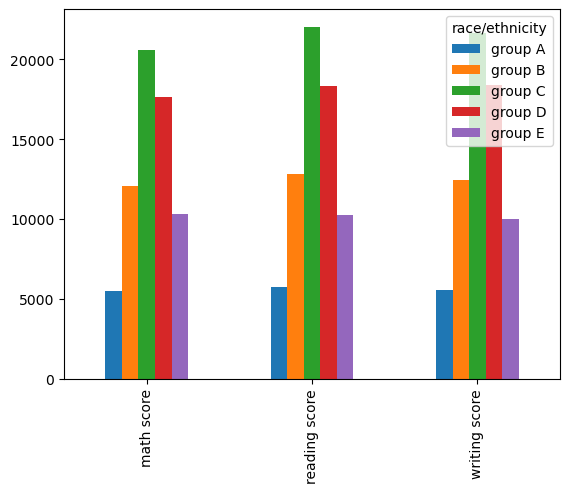

In [97]:
ax = df_pivot.plot(kind="bar")


In [98]:
px.bar(race_scores,barmode='group',title='BEST PERFORMING RACE')

#  Does one particular gender excel another in maths, reading, writing and overall? 

In [13]:

# Separate the data by gender
male_scores = df[df['gender'] == 'Male']['math score']
female_scores = df[df['gender'] == 'Female']['math score']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(male_scores, female_scores)

alpha = 0.05  # significance level


if p_value < alpha:
    print("There is a statistically significant difference between the genders in math scores.",)
else:
    print("There is no statistically significant difference between the genders in math scores.")

nan
There is no statistically significant difference between the genders in math scores.


In [99]:
gender_scores=df.groupby('gender')[['math score','reading score','writing score']].sum()

In [100]:
gender_scores

,math score,reading score,writing score
gender,,,
female,32962,37611,37538
male,33127,31558,30516


<AxesSubplot:title={'center':'best performing gender'}, xlabel='gender'>

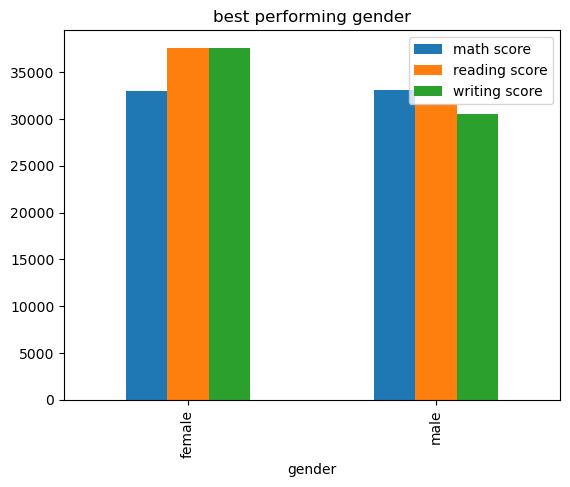

In [154]:
gender_scores.plot(kind='bar',title='best performing gender')

In [101]:
px.bar(gender_scores,barmode='group',title='BEST PERFORMING GENDER')

# Does student good at math= bad at writing?

In [14]:
correlation = df['math score'].corr(df['writing score'])

# Check if the correlation is negative
if correlation < 0:
    print("There is a negative correlation between math and writing scores.")
    print("Students who are good at math tend to be relatively bad at writing.")
else:
    print("There is  significant positive correlation between math and writing scores.")

# Display the correlation coefficient
print("Correlation coefficient:", correlation)

There is  significant positive correlation between math and writing scores.
Correlation coefficient: 0.8026420459498085


In [104]:
def score(x):
    if x > 60:
        return 'good'
    else:
        return 'bad'

In [107]:
df['math rating'] = df['math score'].apply(score)
df['writing rating']=df['writing score'].apply(score)

In [108]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percent,math rating,writing rating
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,good,good
1,female,group C,some college,standard,completed,69,90,88,82.33,good,good
2,female,group B,master's degree,standard,none,90,95,93,92.67,good,good
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,bad,bad
4,male,group C,some college,standard,none,76,78,75,76.33,good,good
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,good,good
996,male,group C,high school,free/reduced,none,62,55,55,57.33,good,bad
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,bad,good
998,female,group D,some college,standard,completed,68,78,77,74.33,good,good


In [130]:
good_math=df[df['math rating']=='good'].shape[0]
good_writing=df[df['writing rating']=='bad'].shape[0]

In [131]:
good_math

661

In [132]:
good_writing

301

In [128]:
good_math_bad_writing = df[(df['math rating'] == 'good') & (df['writing rating'] == 'bad')]


In [134]:
good_math_bad_writing


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percent,math rating,writing rating
26,male,group B,some college,standard,none,69,54,55,59.33,good,bad
45,male,group B,associate's degree,standard,none,65,54,57,58.67,good,bad
62,male,group A,associate's degree,free/reduced,none,62,61,55,59.33,good,bad
68,male,group B,associate's degree,free/reduced,none,61,58,56,58.33,good,bad
73,male,group C,some high school,free/reduced,none,61,57,56,58.00,good,bad
...,...,...,...,...,...,...,...,...,...,...,...
936,male,group A,associate's degree,standard,none,67,57,53,59.00,good,bad
964,male,group D,some college,standard,none,72,57,58,62.33,good,bad
967,male,group C,some college,standard,none,63,63,60,62.00,good,bad
977,male,group C,associate's degree,standard,none,62,65,58,61.67,good,bad


#  Does practice help to excel scores ? 

In [141]:
practice_scores=df.groupby('test preparation course')['percent'].mean().to_frame()

In [144]:
practice_pivot=pd.pivot_table(practice_scores,
                             values='percent',
                             columns='test preparation course')

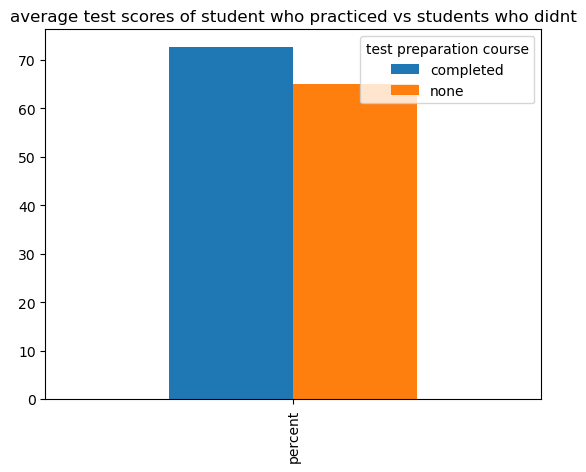

In [147]:
c=practice_pivot.plot(kind='bar',title='average test scores of student who practiced vs students who didnt')

#  Check if parents with educational background affects students performance

In [149]:
background_performance=df.groupby('parental level of education').mean()

In [150]:
background_performance

,math score,reading score,writing score,percent
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,69.568964
bachelor's degree,69.389831,73.000000,73.381356,71.923983
high school,62.137755,64.704082,62.448980,63.097194
master's degree,69.745763,75.372881,75.677966,73.598644
some college,67.128319,69.460177,68.840708,68.476106
some high school,63.497207,66.938547,64.888268,65.107654


In [152]:
px.bar(background_performance,title='influence of parental level of education ',barmode='group')

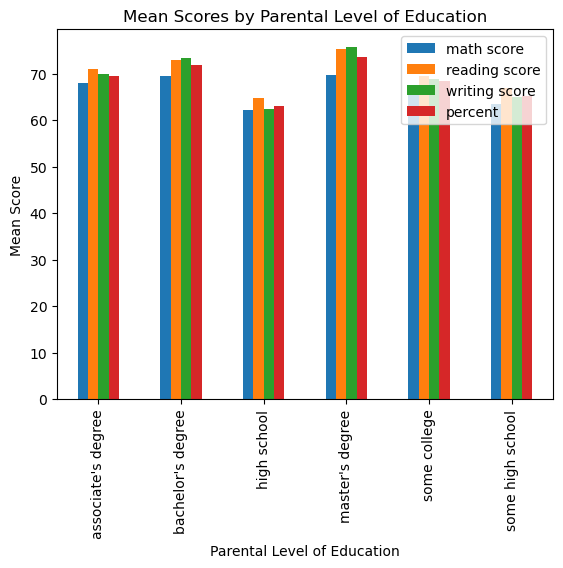

In [153]:
background_performance.plot(kind='bar')
plt.title("Mean Scores by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Mean Score")
plt.show()